## Convolutional Autoencoder

In [1]:
import manga109api
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import skimage
%matplotlib inline

In [2]:
manga109_root = "../datasets/Manga109/Manga109_released_2021_12_30"
dataset = manga109api.Parser(manga109_root)

In [3]:
def data(is_train = True):
    """define a generator as input to training to not overload the RAM"""
    # set seed so that the size of training/testing set doesn't vary
    random.seed(175069818)
    for book in dataset.books:
        for page in dataset.get_annotation(book)["page"]:
            num = random.randint(0, 19)
            if num % 20 == 0 and is_train: continue
            if num % 20 != 0 and (not is_train): continue
            image = tf.convert_to_tensor((skimage.io.imread("../datasets/Manga109/Manga109_released_2021_12_30/scaled_text_stripped_images/" + book + "/%03d.jpg" % (page["@index"])))/255)
            yield image, image

In [4]:
"""covert generator to tensorflow dataset"""
train_data = tf.data.Dataset.from_generator(data,
                               output_signature=(
                                   tf.TensorSpec(shape=(512,512,3)),
                                   tf.TensorSpec(shape=(512,512,3))
                               )).batch(batch_size=15)
test_data = tf.data.Dataset.from_generator(lambda: data(False),
                               output_signature=(
                                   tf.TensorSpec(shape=(512,512,3)),
                                   tf.TensorSpec(shape=(512,512,3))
                               )).batch(batch_size=15)

In [5]:
"""create autoencoder neural network"""
class Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential()
        self.decoder = tf.keras.Sequential()
        for i in range(3):
            self.encoder.add(layers.Conv2D(32, (3, 3), padding="same"))
            self.encoder.add(layers.LeakyReLU(0.1))
            self.encoder.add(layers.MaxPooling2D((2, 2), padding="same"))
            self.decoder.add(layers.Conv2DTranspose(32, (3, 3), strides=2, padding="same"))
            self.decoder.add(layers.LeakyReLU(0.1))
        self.decoder.add(layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same"))
    def call(self, _input):
        encoded = self.encoder(_input)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
autoencoder = Autoencoder()
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

In [6]:
# train the autoencoder, ran a total of 5 epochs
autoencoder.fit(
    x=train_data,
    epochs=2,
    validation_data=test_data
)

Epoch 1/2
672/672 [==============================] - 537s 792ms/step - loss: 0.0334 - val_loss: 0.0219
Epoch 2/2
672/672 [==============================] - 504s 750ms/step - loss: 0.0200 - val_loss: 0.0191


In [9]:
autoencoder.fit(
    x=train_data,
    epochs=1,
    validation_data=test_data
)

672/672 [==============================] - 521s 768ms/step - loss: 0.0181 - val_loss: 0.0173


In [10]:
autoencoder.fit(
    x=train_data,
    epochs=1,
    validation_data=test_data
)

672/672 [==============================] - 508s 756ms/step - loss: 0.0160 - val_loss: 0.0158


In [12]:
autoencoder.fit(
    x=train_data,
    epochs=1,
    validation_data=test_data
)

672/672 [==============================] - 501s 746ms/step - loss: 0.0150 - val_loss: 0.0150


In [13]:
autoencoder.save("model/autoencoder")

INFO:tensorflow:Assets written to: model/autoencoder\assets


In [18]:
autoencoder = tf.keras.models.load_model("model/autoencoder", custom_objects = {"Autoencoder": Autoencoder})

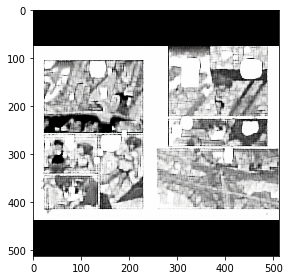

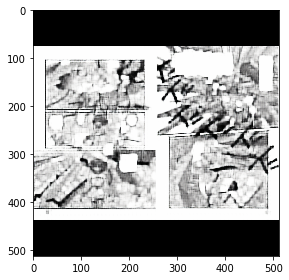

In [20]:
book = "ARMS"
page = {}
page["@index"] = 4
predicted = autoencoder.predict(tf.convert_to_tensor([skimage.io.imread("../datasets/Manga109/Manga109_released_2021_12_30/scaled_text_stripped_images/" + book + "/%03d.jpg" % (page["@index"]))/255, skimage.io.imread("../datasets/Manga109/Manga109_released_2021_12_30/scaled_text_stripped_images/" + book + "/%03d.jpg" % (5))/255]))
skimage.io.imshow(predicted[0])
plt.show()
skimage.io.imshow(predicted[1])
plt.show()

## References

[https://keras.io/examples/vision/autoencoder/](https://keras.io/examples/vision/autoencoder/)